# Results from DFT Calculations
This jupyter notebook extracts the results from the DFT calculations given from VASP.

## Bulk Calculations
The figure below illustrates a unit cell of a structure on the form AB$_2$ with a space group: Pnma 62, which illustrates an orthorombic structure containing 8 A(Ba $\&$ Sr)-atoms  (large green spheres) and 16 B (Si, Ge, C)-atoms (small blue spheres) that are contained in the unit cell.

<img src="../Results/Figures/cell.png">

### Convergence
In this section we are going to check convergence of various calculated properties and we will focus on the material BaSi$_2$ for the convergence tests, and base our calculation on these values throughout this project. 


#### Total Energy
We start by looking at the convergence of the total energy as a function of the energy cutoff.This can be visualized by plotting the total energy as a function of the cutoff energy and this isillustrated in Figure 1 below

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()
from python_scripts.functions.data import readFilesFromDirectory, readEnergyFromFile


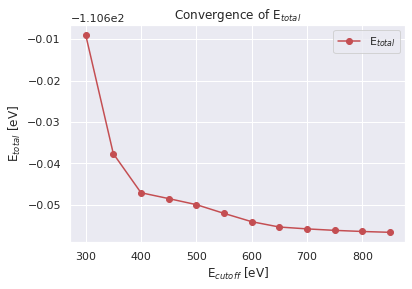

In [2]:
thisdir = '../Results/Bulk/BaSi2/Convergence'
filepaths, filenames = readFilesFromDirectory(thisdir)
data = readEnergyFromFile(filepaths, filenames)


total_energy = data['ecut1.txt']
cutoff = np.linspace(300, 850, 12)

plt.plot(cutoff, total_energy, "-or")
plt.legend(["E$_{total}$"])
plt.title("Convergence of E$_{total}$")
plt.xlabel("E$_{cutoff}$ [eV]")
plt.ylabel("E$_{total}$ [eV]")
plt.show()

#### Relative Energy

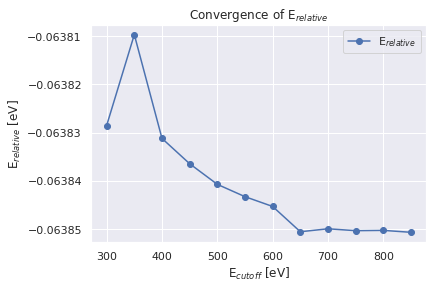

In [3]:
relative_energy = data['ecut1.txt'] - data['ecut2.txt']

plt.plot(cutoff, relative_energy, "-ob")
plt.legend(["E$_{relative}$"])
plt.title("Convergence of E$_{relative}$")
plt.xlabel("E$_{cutoff}$ [eV]")
plt.ylabel("E$_{relative}$ [eV]")
plt.show()

#### K-Density

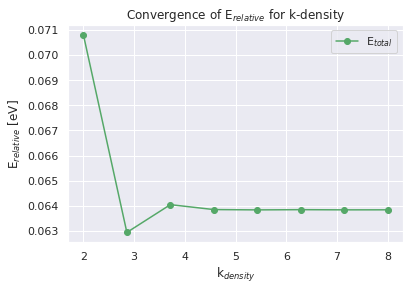

In [4]:
kpoints = np.linspace(2,8,8)
relative_kdensity = data['kdensity2.txt'] - data['kdensity1.txt']

plt.plot(kpoints, relative_kdensity, "-og")
plt.legend(["E$_{total}$"])
plt.title("Convergence of E$_{relative}$ for k-density")
plt.xlabel("k$_{density}$")
plt.ylabel("E$_{relative}$ [eV]")
plt.show()

## Layer Calculations

### Convergence

#### Vacuum 

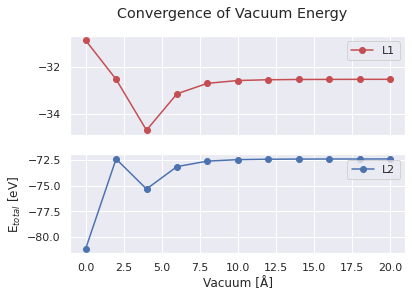

In [5]:
thisdir = '../Results/Layers/convergence_Results/L1'
filepaths, filenames = readFilesFromDirectory(thisdir)
data1 = readEnergyFromFile(filepaths, filenames)

thisdir = '../Results/Layers/convergence_Results/L2'
filepaths, filenames = readFilesFromDirectory(thisdir)
data2 = readEnergyFromFile(filepaths, filenames)


vacuum_energy1 = data1['vacuum.txt']
vacuum_energy2 = data2['vacuum.txt']
vacuum = np.linspace(0, 20, 11)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Convergence of Vacuum Energy')

ax1.plot(vacuum, vacuum_energy1, "-or", label='L1')
ax1.legend(loc="upper right")
ax2.plot(vacuum, vacuum_energy2, "-ob", label='L2')
ax2.legend(loc="upper right")
plt.xlabel("Vacuum [Å]")
plt.ylabel("E$_{total}$ [eV]")
plt.show()


#### Total Energy
Both for 1 layer and 2 layers

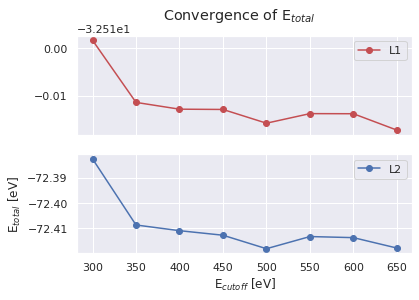

In [6]:
total_energy1 = data1['ecut1.txt']
total_energy2 = data2['ecut1.txt']
cutoff = np.linspace(300, 650, 8)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Convergence of E$_{total}$')

ax1.plot(cutoff, total_energy1, "-or", label='L1')
ax1.legend(loc="upper right")
ax2.plot(cutoff, total_energy2, "-ob", label='L2')
ax2.legend(loc="upper right")
plt.xlabel("E$_{cutoff}$ [eV]")
plt.ylabel("E$_{total}$ [eV]")
plt.show()


#### Relative Energy

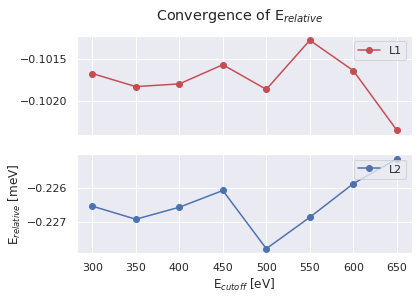

In [7]:
relative_energy1 = data1['ecut1.txt'] - data1['ecut2.txt']
relative_energy2 = data2['ecut1.txt'] - data2['ecut2.txt']
cutoff = np.linspace(300, 650, 8)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Convergence of E$_{relative}$')

ax1.plot(cutoff, relative_energy1, "-or", label='L1')
ax1.legend(loc="upper right")
ax2.plot(cutoff, relative_energy2, "-ob", label='L2')
ax2.legend(loc="upper right")
plt.xlabel("E$_{cutoff}$ [eV]")
plt.ylabel("E$_{relative}$ [meV]")
plt.show()


#### Kdensity

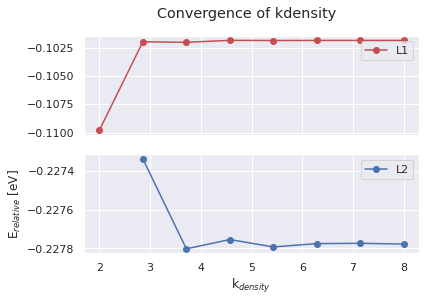

In [8]:
kdensity_energy1 = data1['kdensity1.txt'] - data1['kdensity2.txt']
kdensity_energy2 = data2['kdensity1.txt'] - data2['kdensity2.txt'][1:]
kponints = np.linspace(2, 9, 8)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Convergence of kdensity')

ax1.plot(kpoints, kdensity_energy1, "-or", label='L1')
ax1.legend(loc="upper right")
ax2.plot(kpoints[1:], kdensity_energy2, "-ob", label='L2')
ax2.legend(loc="upper right")
plt.xlabel("k$_{density}$ ")
plt.ylabel("E$_{relative}$ [eV]")
plt.show()


#### Extracting Energy calculation for single atoms

Assigning the energy values for the single atom and crystal calculation

In [9]:
thisdir = '../Results/atom_Energy'
filepaths, filenames = readFilesFromDirectory(thisdir)
data = readEnergyFromFile(filepaths, filenames)

barium = data['barium.txt']
silicon = data['silicon.txt']
carbon = data['carbon.txt']

basi2_atoms = 8*barium[0] + 16*silicon[0]
basi2_crystal = 4*barium[1] + 2*silicon[2]
basi2_cluster = 8*barium[0] + 4*silicon[1]

#graphite_atoms = 

### Interlayer Energy calculations
Extracting the data from the text files and visualize the data in plots

In [10]:
pbe = []
dft_d3 = []
lda = []
rev = []
vdw = []

thisdir = '../Results/Layers/L_L_distance/BaSi2/Run1'
filepaths, filenames = readFilesFromDirectory(thisdir)
data1 = readEnergyFromFile(filepaths, filenames)


for i in range(len(data1['DFT_D3.txt'])):
    pbe.append(data1['PBE.txt'][i])
    dft_d3.append(data1['DFT_D3.txt'][i])
    lda.append(data1['LDA.txt'][i])
    rev.append(data1['rev_vdW_DF2.txt'][i])
    vdw.append(data1['vdW_opt88.txt'][i])


    
    
thisdir = '../Results/Layers/L_L_distance/BaSi2/Run2'
filepaths, filenames = readFilesFromDirectory(thisdir)
data2 = readEnergyFromFile(filepaths, filenames)

for i in range(1, len(data1['DFT_D3.txt'])):
    pbe.append(data2['PBE.txt'][i])
    dft_d3.append(data2['DFT_D3.txt'][i])
    lda.append(data2['LDA.txt'][i])
    rev.append(data2['rev_vdW_DF2.txt'][i])
    vdw.append(data2['vdW_opt88.txt'][i])


pbe = np.array(pbe)
dft_d3 = np.array(dft_d3)
lda = np.array(lda)
rev = np.array(rev)
vdw = np.array(vdw)

# The starting distance between layers
origo = 4.641434669 - 4.368033409 # Between atom 3 and 4


x = np.linspace(-0.8, 1.0, len(pbe))
x += origo
n = 24

E_c = 0#basi2_atoms

df=pd.DataFrame({'x': x, 'pbe': (pbe-E_c)/n, 'dft_d3': (dft_d3-E_c)/n, 'lda': (lda-E_c)/n, 
    'rev': (rev-E_c)/n, 'vdw': (vdw-E_c)/n})
 


In [11]:
pbe_1 = []
dft_d3_1 = []
lda_1 = []
rev_1 = []
vdw_1 = []

thisdir = '../Results/Layers/L_L_distance/Graphite/Run1'
filepaths, filenames = readFilesFromDirectory(thisdir)
data1 = readEnergyFromFile(filepaths, filenames)


for i in range(len(data1['DFT_D3.txt'])):
    pbe_1.append(data1['PBE.txt'][i])
    dft_d3_1.append(data1['DFT_D3.txt'][i])
    lda_1.append(data1['LDA.txt'][i])
    rev_1.append(data1['rev_vdW_DF2.txt'][i])
    vdw_1.append(data1['vdW_opt88.txt'][i])


    
  
thisdir = '../Results/Layers/L_L_distance/Graphite/Run2'
filepaths, filenames = readFilesFromDirectory(thisdir)
data2 = readEnergyFromFile(filepaths, filenames)

for i in range(1, len(data1['DFT_D3.txt'])):
    pbe_1.append(data2['PBE.txt'][i])
    dft_d3_1.append(data2['DFT_D3.txt'][i])
    lda_1.append(data2['LDA.txt'][i])
    rev_1.append(data2['rev_vdW_DF2.txt'][i])
    vdw_1.append(data1['vdW_opt88.txt'][i])


pbe_1 = np.array(pbe_1)
dft_d3_1 = np.array(dft_d3_1)
lda_1 = np.array(lda_1)
rev_1 = np.array(rev_1)
vdw_1 = np.array(vdw_1)

# The starting distance between layers
origo_1 = 3.348000050 # Between atom 1 and 2


x_1 = np.linspace(-0.3, 0, len(pbe_1))
x_1 += origo_1
n_1 = 4

E_c_1 = 0#4*carbon 

df1=pd.DataFrame({'x': x_1, 'pbe': (pbe_1-E_c_1)/n_1, 'dft_d3': (dft_d3_1-E_c_1)/n_1, 'lda': (lda_1-E_c_1)/n_1, 
    'rev': (rev_1-E_c_1)/n_1, 'vdw': (vdw_1-E_c_1)/n_1})
 


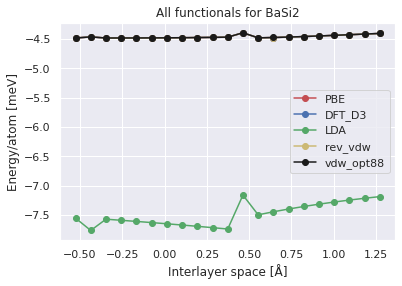

In [12]:
plt.plot(x, df['pbe'], "-or")
plt.plot(x, df['dft_d3'], "-ob")
plt.plot(x, df['lda'], "-og")
plt.plot(x, df['rev'], "-oy")
plt.plot(x, df['vdw'], "-ok")
plt.legend(["PBE", "DFT_D3", "LDA", "rev_vdw", "vdw_opt88"])
plt.title("All functionals for BaSi2")
plt.xlabel("Interlayer space [Å]")
plt.ylabel("Energy/atom [meV]")
plt.show()

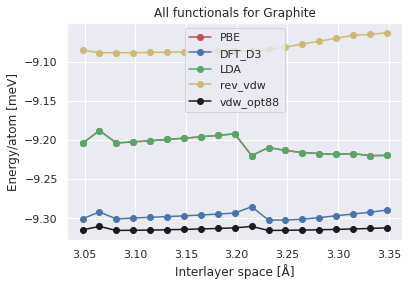

In [13]:
plt.plot(x_1, df1['pbe'], "-or")
plt.plot(x_1, df1['dft_d3'], "-ob")
plt.plot(x_1, df1['lda'], "-og")
plt.plot(x_1, df1['rev'], "-oy")
plt.plot(x_1, df1['vdw'], "-ok")
plt.legend(["PBE", "DFT_D3", "LDA", "rev_vdw", "vdw_opt88"])
plt.title("All functionals for Graphite")
plt.xlabel("Interlayer space [Å]")
plt.ylabel("Energy/atom [meV]")
plt.show()

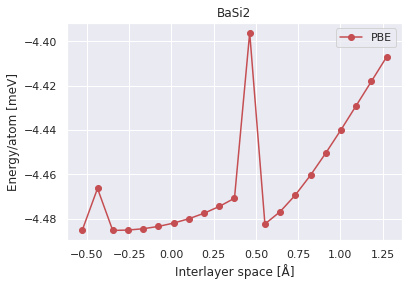

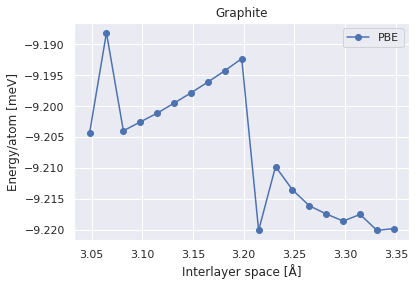

In [14]:
plt.plot(x, df['pbe'], "-or")
plt.legend(["PBE"])
plt.title("BaSi2")
plt.xlabel("Interlayer space [Å]")
plt.ylabel("Energy/atom [meV]")
plt.show()

plt.plot(x_1, df1['pbe'], "-ob")
plt.legend(["PBE"])
plt.title("Graphite")
plt.xlabel("Interlayer space [Å]")
plt.ylabel("Energy/atom [meV]")
plt.show()



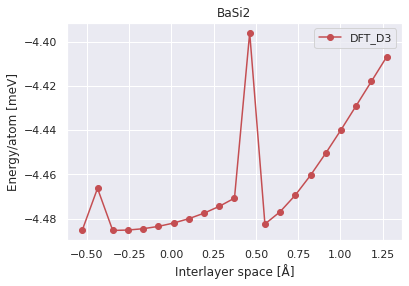

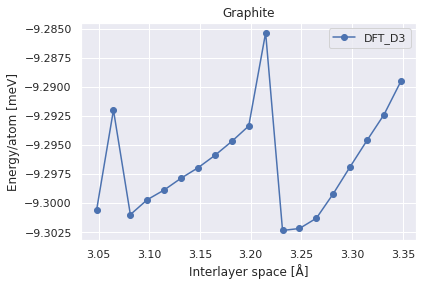

In [15]:
plt.plot(x, df['dft_d3'], "-or")
plt.legend(["DFT_D3"])
plt.title("BaSi2")
plt.xlabel("Interlayer space [Å]")
plt.ylabel("Energy/atom [meV]")
plt.show()

plt.plot(x_1, df1['dft_d3'], "-ob")
plt.legend(["DFT_D3"])
plt.title("Graphite")
plt.xlabel("Interlayer space [Å]")
plt.ylabel("Energy/atom [meV]")
plt.show()


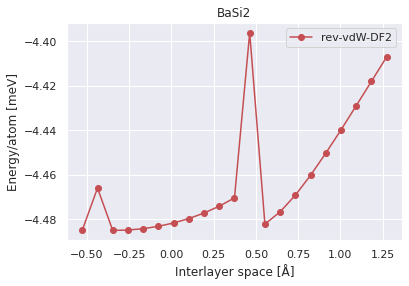

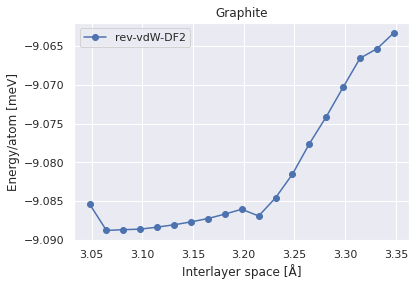

In [16]:
plt.plot(x, df['rev'], "-or")
plt.legend(["rev-vdW-DF2"])
plt.title("BaSi2")
plt.xlabel("Interlayer space [Å]")
plt.ylabel("Energy/atom [meV]")
plt.show()

plt.plot(x_1, df1['rev'], "-ob")
plt.legend(["rev-vdW-DF2"])
plt.title("Graphite")
plt.xlabel("Interlayer space [Å]")
plt.ylabel("Energy/atom [meV]")
plt.show()

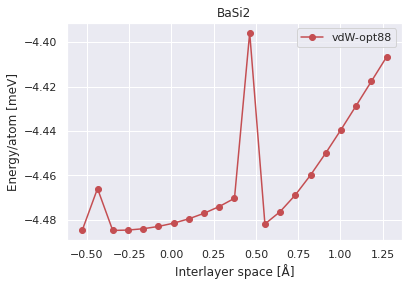

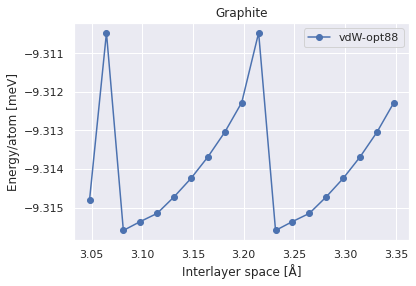

In [17]:
plt.plot(x, df['vdw'], "-or")
plt.legend(["vdW-opt88"])
plt.title("BaSi2")
plt.xlabel("Interlayer space [Å]")
plt.ylabel("Energy/atom [meV]")
plt.show()

plt.plot(x_1, df1['vdw'], "-ob")
plt.legend(["vdW-opt88"])
plt.title("Graphite")
plt.xlabel("Interlayer space [Å]")
plt.ylabel("Energy/atom [meV]")
plt.show()



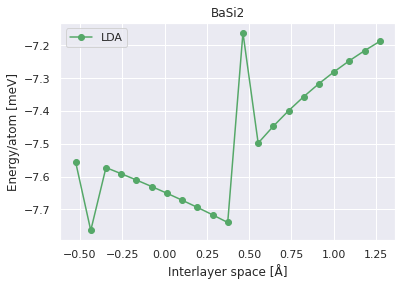

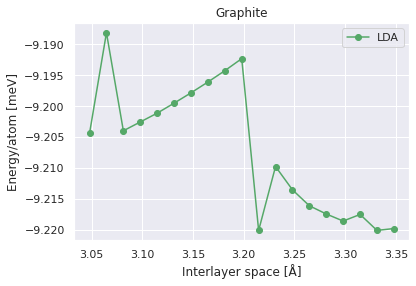

In [18]:
plt.plot(x, df['lda'], "-og")
plt.legend(["LDA"])
plt.title("BaSi2")
plt.xlabel("Interlayer space [Å]")
plt.ylabel("Energy/atom [meV]")
plt.show()

plt.plot(x_1, df1['lda'], "-og")
plt.legend(["LDA"])
plt.title("Graphite")
plt.xlabel("Interlayer space [Å]")
plt.ylabel("Energy/atom [meV]")
plt.show()

### Relaxation of Layer structures
Extracting the data from the text files and visualize the data in a table

In [19]:
thisdir = '../Results/Layers/text_files'
filepaths, filenames = readFilesFromDirectory(thisdir)


data = readEnergyFromFile(filepaths, filenames)


In [20]:
#from tabulate import tabulate


l1 = pd.DataFrame(data['L1_etot.txt'], columns=['Etot'], 
                  index=['Method1', 'Rel', 'Unrel'])
l2 = pd.DataFrame(data['L2_etot.txt'], columns=['Etot'],
                 index=['Method1', 'Method2', 'Method3', 'Rel', 'Unrel'])
l3 = pd.DataFrame(data['L3_etot.txt'], columns=['Etot'], index=['Rel', 'Unrel'])
l4 = pd.DataFrame(data['L4_etot.txt'], columns=['Etot'], 
                  index=['Method1', 'Method2', 'Method3', 'Rel', 'Unrel'])



def E_c(l, string):
    if string == "atoms":
        x = l*(4*barium[0] + 8*silicon[0])
    elif string == "crystal":
        x = l*(2*barium[1] + 1*silicon[2])

    elif string == "cluster":
        x = l*(4*barium[0] + 2*silicon[1])
    
    else:
        x = 0
    return x


def presentdata(data, layer):
    data.index.name = 'Layer ' + str(layer)
    dic = {'E_atoms': 'atoms', 'E_crystal': 'crystal', 'E_cluster': 'cluster'}
    
    for k,v in dic.items():
        data[k] = data['Etot'] - E_c(layer, v)

    print(data.to_markdown(tablefmt="grid"))


#### Tables of energy data

In [21]:
presentdata(l1, 1)

+-----------+----------+-----------+-------------+-------------+
| Layer 1   |     Etot |   E_atoms |   E_crystal |   E_cluster |
+===========+==========+===========+=============+=============+
| Method1   | -44.4619 |  -51.8971 |   -0.39857  |    -25.4992 |
+-----------+----------+-----------+-------------+-------------+
| Rel       | -44.4607 |  -51.8959 |   -0.397376 |    -25.498  |
+-----------+----------+-----------+-------------+-------------+
| Unrel     | -41.2766 |  -48.7117 |    2.78682  |    -22.3138 |
+-----------+----------+-----------+-------------+-------------+


In [22]:
presentdata(l2, 2)

+-----------+----------+-----------+-------------+-------------+
| Layer 2   |     Etot |   E_atoms |   E_crystal |   E_cluster |
+===========+==========+===========+=============+=============+
| Method1   | -91.3016 |  -106.172 |    -3.17488 |    -53.3762 |
+-----------+----------+-----------+-------------+-------------+
| Method2   | -91.3016 |  -106.172 |    -3.17488 |    -53.3762 |
+-----------+----------+-----------+-------------+-------------+
| Method3   | -91.3016 |  -106.172 |    -3.17488 |    -53.3762 |
+-----------+----------+-----------+-------------+-------------+
| Rel       | -91.3006 |  -106.171 |    -3.17382 |    -53.3751 |
+-----------+----------+-----------+-------------+-------------+
| Unrel     | -89.9159 |  -104.786 |    -1.78914 |    -51.9905 |
+-----------+----------+-----------+-------------+-------------+


In [23]:
presentdata(l3, 3)

+-----------+----------+-----------+-------------+-------------+
| Layer 3   |     Etot |   E_atoms |   E_crystal |   E_cluster |
+===========+==========+===========+=============+=============+
| Rel       | -139.913 |  -162.218 |    -7.72268 |    -83.0247 |
+-----------+----------+-----------+-------------+-------------+
| Unrel     | -138.656 |  -160.962 |    -6.46627 |    -81.7683 |
+-----------+----------+-----------+-------------+-------------+


In [24]:
presentdata(l4, 4)

+-----------+----------+-----------+-------------+-------------+
| Layer 4   |     Etot |   E_atoms |   E_crystal |   E_cluster |
+===========+==========+===========+=============+=============+
| Method1   | -188.607 |  -218.348 |    -12.354  |    -112.757 |
+-----------+----------+-----------+-------------+-------------+
| Method2   | -188.607 |  -218.348 |    -12.354  |    -112.757 |
+-----------+----------+-----------+-------------+-------------+
| Method3   | -188.607 |  -218.348 |    -12.354  |    -112.757 |
+-----------+----------+-----------+-------------+-------------+
| Rel       | -188.605 |  -218.346 |    -12.3516 |    -112.754 |
+-----------+----------+-----------+-------------+-------------+
| Unrel     | -187.342 |  -217.083 |    -11.0888 |    -111.491 |
+-----------+----------+-----------+-------------+-------------+


### Band structure and Density of states

/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Layers/dos/L2
  warnings.warn("No POTCAR file with matching TITEL fields"


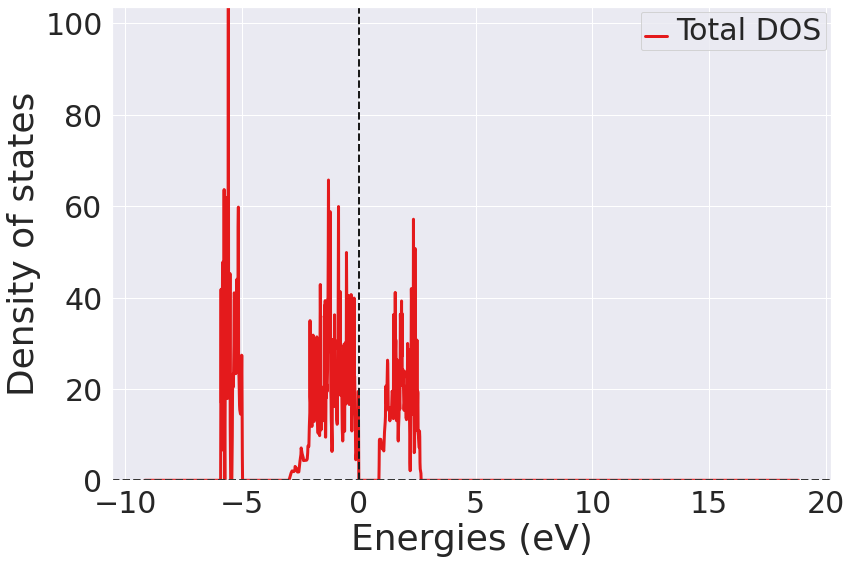

In [25]:
from pymatgen.io.vasp import Vasprun, BSVasprun
from pymatgen.electronic_structure.plotter import DosPlotter, BSPlotter, BSDOSPlotter

thisdir = '../Results/Layers/dos/L2/'


v = Vasprun(thisdir+'vasprun.xml')
tdos = v.tdos
plotter = DosPlotter()
plotter.add_dos("Total DOS", tdos)
plotter.show()

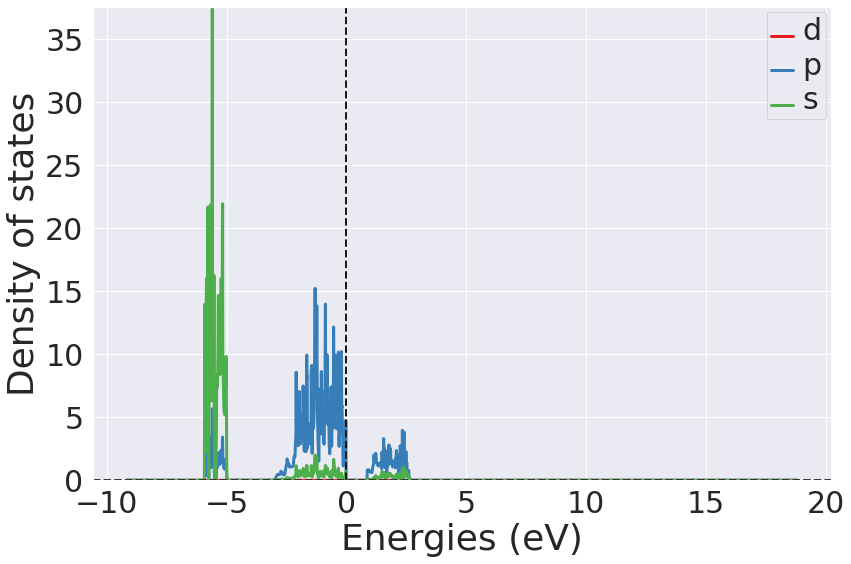

In [26]:
structure = v.structures
pdos = v.pdos
cdos = v.complete_dos
#element_dos = cdos.get_elemet_dos()
element_spd_dos = cdos.get_element_spd_dos('Si')
plotter = DosPlotter()
plotter.add_dos_dict(element_spd_dos)
plotter.show()

<module 'matplotlib.pyplot' from '/home/msismail/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

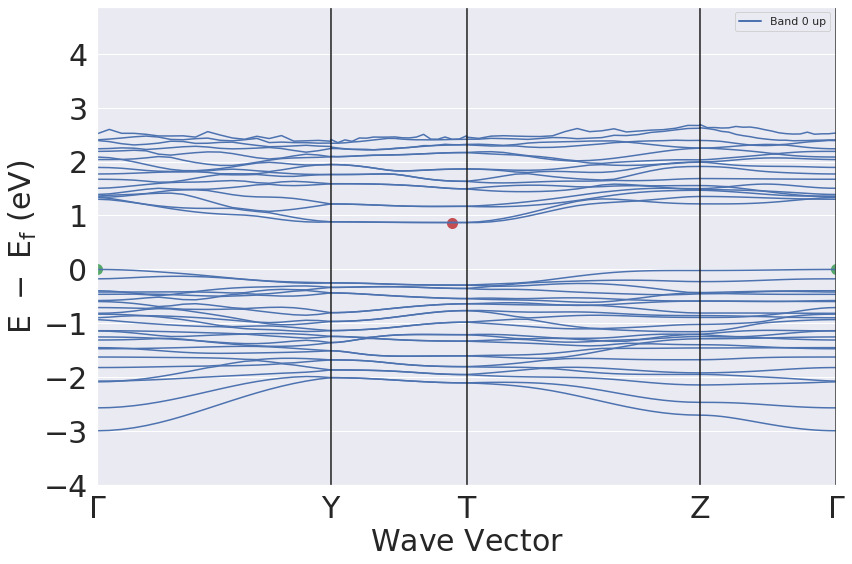

In [27]:
thisdir = '../Results/Layers/band_structure/rev-vdW-DF2/L2/'

v = BSVasprun(thisdir + 'vasprun.xml')
bs = v.get_band_structure(line_mode=True)
plt = BSPlotter(bs)
plt.get_plot(vbm_cbm_marker=True)

In [30]:
thisdir = '../Results/Layers/band_structure/HSE/Bulk/'

v = Vasprun(thisdir + 'vasprun.xml')
gap = v.eigenvalue_band_properties
print(gap)

(1.1669000000000005, 4.5456, 3.3787, False)


/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Layers/band_structure/HSE/Bulk
  warnings.warn("No POTCAR file with matching TITEL fields"
